In [ ]:
"""
Final Visualization Notebook for Task 1
This notebook is dedicated to producing 3 creative and beautiful plots
that capture key insights from the EDA of the AlphaCare Insurance data.
"""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

C:\Users\user\AppData\Local\Temp\ipykernel_15300\4039293792.py:5: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(filepath, delimiter='|')
C:\Users\user\AppData\Local\Temp\ipykernel_15300\4039293792.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=province_avg.values, y=province_avg.index, palette="viridis")


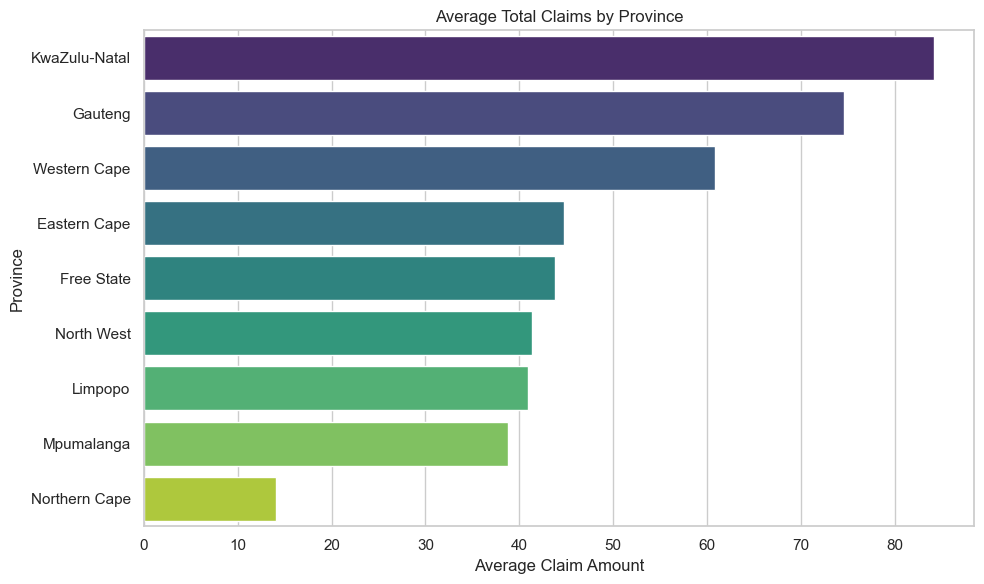

C:\Users\user\AppData\Local\Temp\ipykernel_15300\4039293792.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=make_premium.values, y=make_premium.index, palette="cubehelix")


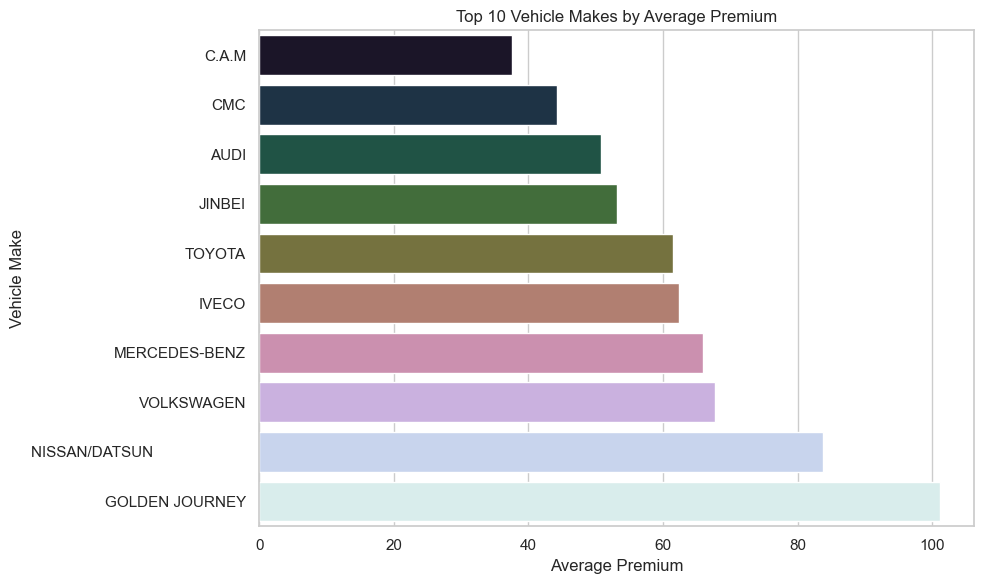

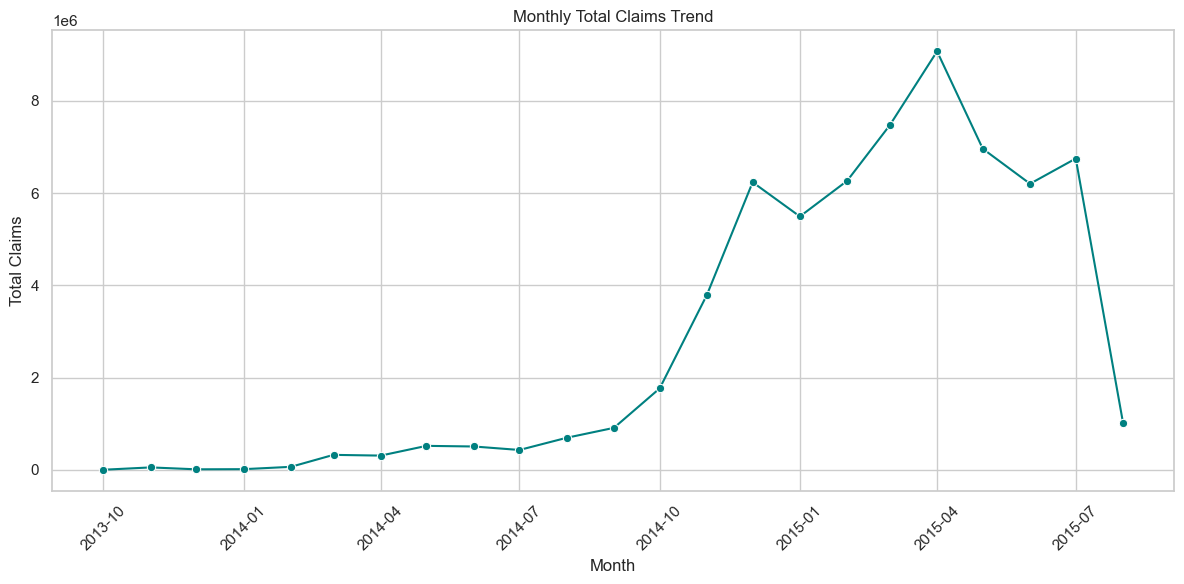

In [2]:
sns.set(style="whitegrid")

# Load cleaned data (assumes correct delimiter and formatting)
def load_data(filepath):
    return pd.read_csv(filepath, delimiter='|')

# Plot 1: Average Claim by Province
def plot_avg_claim_by_province(df):
    province_avg = df.groupby('Province')['TotalClaims'].mean().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=province_avg.values, y=province_avg.index, palette="viridis")
    plt.title("Average Total Claims by Province")
    plt.xlabel("Average Claim Amount")
    plt.ylabel("Province")
    plt.tight_layout()
    plt.show()

# Plot 2: Vehicle Make vs Total Premium
def plot_make_vs_premium(df):
    top_makes = df['make'].value_counts().nlargest(10).index
    make_premium = df[df['make'].isin(top_makes)].groupby('make')['TotalPremium'].mean().sort_values()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=make_premium.values, y=make_premium.index, palette="cubehelix")
    plt.title("Top 10 Vehicle Makes by Average Premium")
    plt.xlabel("Average Premium")
    plt.ylabel("Vehicle Make")
    plt.tight_layout()
    plt.show()

# Plot 3: Monthly Trend of Total Claims
def plot_monthly_claim_trend(df):
    df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
    monthly = df.groupby(df['TransactionMonth'].dt.to_period('M'))['TotalClaims'].sum()
    monthly.index = monthly.index.to_timestamp()
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=monthly.index, y=monthly.values, marker='o', color='teal')
    plt.title("Monthly Total Claims Trend")
    plt.xlabel("Month")
    plt.ylabel("Total Claims")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Main
if __name__ == "__main__":
    filepath = "../data/MachineLearningRating_v3.txt"
    df = load_data(filepath)

    # Filter numerical data
    df[['TotalPremium', 'TotalClaims']] = df[['TotalPremium', 'TotalClaims']].apply(pd.to_numeric, errors='coerce')

    plot_avg_claim_by_province(df)
    plot_make_vs_premium(df)
    plot_monthly_claim_trend(df)